<h1 style="color:black; text-align:center">Cosmology Core Library in 10 minutes<br></h1>

<div style="color:gray; text-align:center"> Felipe Andrade-Oliveira: felipeaoli@gmail.com<br></div>


## LSST/ DESC
>LSST DESC Core Cosmology Library (CCL) provides routines to compute basic cosmological observables with validated numerical accuracy. The library is written in C99 and all functionality is directly callable from C and C++ code. We also provide python bindings for higher-level functions.


Atualmente:
- 3100 _commits_
- 39 colaboradores
- 11 _releases_
- 24 _branches_

## Onde procurar ajuda 

1. Repositório e Referências em:  https://github.com/LSSTDESC/CCL
2. Exemplos mostrados aqui e **muitos** outros em: https://github.com/LSSTDESC/CCL/tree/master/examples


- Em desenvolvimento:

## Importando a biblioteca 

In [95]:
import pyccl as ccl

In [86]:
import numpy as np
import matplotlib.pyplot as plt

pars = {'figure.dpi': 150, 'text.usetex': True, 'font.size': 14, 
        'xtick.direction': 'in', 'ytick.direction': 'in',
        'xtick.top': True,'ytick.right': True}
plt.rcParams.update(pars)

## Configurando um objeto  'Cosmology '
Objetos `Cosmology` contém parametros e metadados necessários como inputs de funções. 

Cada instância do objeto `Cosmology` está associada a um conjunto de parâmetros cosmológicos. Exemplos: Modelo **$\Lambda$CDM**, modelo **Einstein-de Sitter**, modelo com modificações da **energia escura**, **neutrinos**, **curvatura** etc

`Cosmology` também possui valores pré-computados para acelerar alguns cálculos (e.g. spline). 



In [96]:
# Definindo sua Cosmologia 
%time cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96, Neff=3.046, Omega_k=0.)

CPU times: user 238 µs, sys: 17 µs, total: 255 µs
Wall time: 265 µs


In [7]:
print(cosmo)

pyccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, n_s=0.96, sigma8=None, A_s=2.1e-09, Omega_k=0.0, Omega_g=None, Neff=3.046, w0=-1.0, wa=0.0, bcm_log10Mc=14.079181246047625, bcm_etab=0.5, bcm_ks=55.0, m_nu=0.0, mnu_type=None, z_mg=None, df_mg=None, transfer_function='boltzmann_class', matter_power_spectrum='halofit', baryons_power_spectrum='nobaryons', mass_function='tinker10', halo_concentration='duffy2008', emulator_neutrinos='strict')


### Acessando a documentação

In [16]:
print (cosmo.__doc__)

A cosmology including parameters and associated data.

    .. note:: Although some arguments default to `None`, they will raise a
              ValueError inside this function if not specified, so they are not
              optional.

    .. note:: The parameter Omega_g can be used to set the radiation density
              (not including relativistic neutrinos) to zero. Doing this will
              give you a model that is physically inconsistent since the
              temperature of the CMB will still be non-zero. Note however
              that this approximation is common for late-time LSS computations.

    .. note:: BCM stands for the "baryonic correction model" of Schneider &
              Teyssier (2015; https://arxiv.org/abs/1510.06034). See the
              `DESC Note <https://github.com/LSSTDESC/CCL/blob/master/doc/0000-ccl_note/main.pdf>`_
              for details.

    .. note:: After instantiation, you can set parameters related to the
              internal splines a

### Acessando o valor de um parâmetro

In [97]:
print( cosmo['w0'])
print (cosmo['bcm_ks'])

-1.0
55.0


In [77]:
??cosmo

## Exemplo 1: Distâncias Cosmológicas
Definida a sua cosmologia, podemos calcular as distâncias cosmológicas.

In [89]:
z = 0.5 
ccl.comoving_radial_distance(cosmo, 1/(1+z)) # Mpc

1962.939114147973

 Aceita também um numpy array com fatores de escala $a$ como input 

In [90]:
z_array = np.linspace(0.01, 6, 1000)
dc = ccl.comoving_radial_distance(cosmo, 1/(1+z_array))


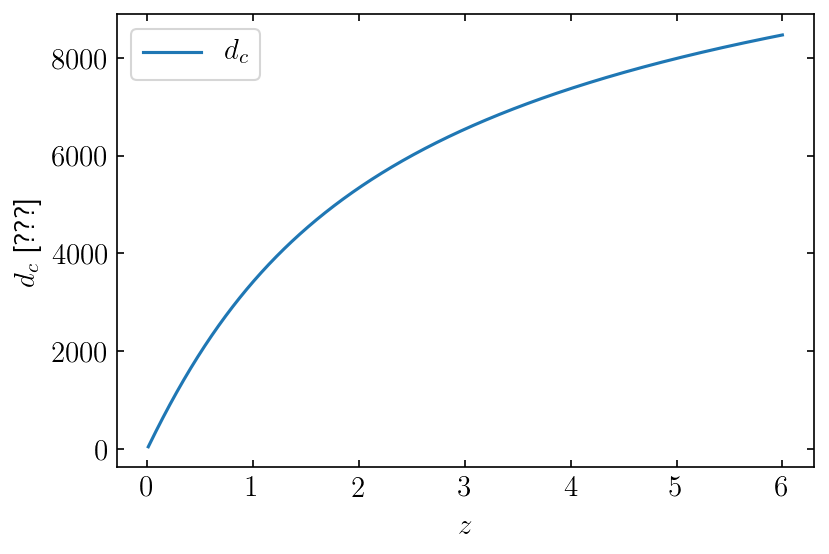

In [91]:
plt.plot ( z_array, dc, label= '$d_c$')
plt.ylabel("$d_c$ [???]")
plt.xlabel("$z$")
plt.legend(loc='best')

In [93]:
# conferindo unidades  !
print(ccl.comoving_radial_distance.__doc__) 
# Equivalent to ??ccl.comoving_radial_distance

Comoving radial distance.

    Args:
        cosmo (:obj:`Cosmology`): Cosmological parameters.
        a (float or array_like): Scale factor(s), normalized to 1 today.

    Returns:
        float or array_like: Comoving radial distance; Mpc.
    


## Exemplo 2: Espectro de Potência da Matéria P(k)

In [70]:
# definindo sua escala k:
k = np.logspace(-5, 1, 1000)

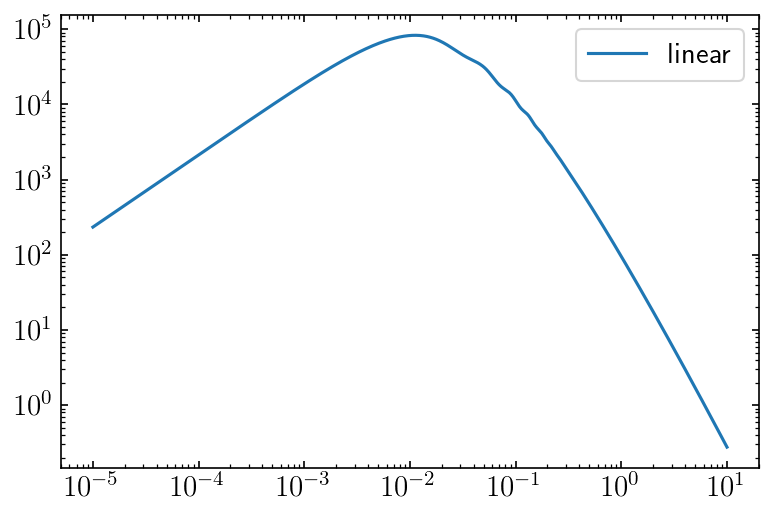

In [100]:
plt.yscale('log')
plt.xscale('log')
plt.plot(k, ccl.linear_matter_power(cosmo, k, 1), label="linear")


# plt.plot(k,ccl.nonlin_matter_power(cosmo, k, 1), label='non-linear')
plt.legend(loc='best')

# Show non-linear 

 **Lição de Casa:** 
 
 1) corrija os eixos e unidades apropriadas  
 Dica:print(ccl.linear_matter_power.__doc__)
 
 2) Compare o P(k) com uma Cosmologia com mais matéria 

## Exemplo 3: Espectro de Potência Angular

In [106]:
z = np.linspace(0., 3., 200)
i_lim = 26. # Limiting i-band magnitude
z0 = 0.0417*i_lim - 0.744

ell = np.arange(2, 2000)
delta_ell = ell[1]-ell[0]
Ngal = 46. * 100.31 * (i_lim - 25.) # Normalisation, galaxies/arcmin^2
pz = 1./(2.*z0) * (z / z0)**2. * np.exp(-z/z0) # Redshift distribution, p(z)
dNdz = Ngal * pz # Number density distribution

# plt.plot(z, dNdz)
# plt.ylabel('dNdz')
# plt.xlabel('z')

In [103]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, n_s=0.96,  sigma8=0.83, transfer_function='bbks')

tracer1 = ccl.WeakLensingTracer(cosmo,dndz=(z,dNdz))
tracer2 = ccl.WeakLensingTracer(cosmo,dndz=(z,dNdz))
data    = ccl.angular_cl(cosmo, tracer1, tracer2, ell) #C_ell

Text(0, 0.5, '$C_\\ell$')

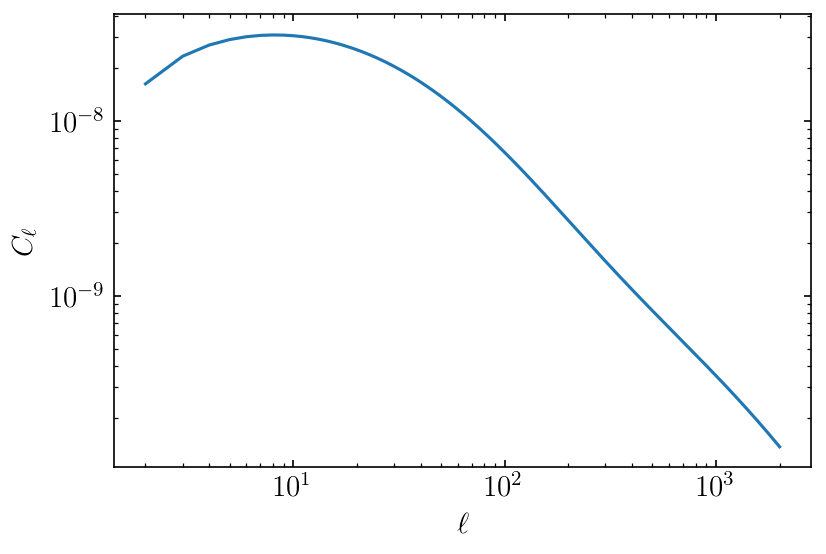

In [104]:
plt.plot(ell,data)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')

In [105]:
??ccl.WeakLensingTracer